# Daily Data Series Analysis

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm
import statsmodels.stats.descriptivestats as ds

In [2]:
def parser(s):
        return datetime.strptime(s, '%d/%m/%Y')

# Read Price Level Data

In [3]:
#Read Gas Price Data
gas_price_df= pd.read_csv(r'C:\Users\Anthony\Desktop\gas_price_clean_d.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(gas_price_df.shape)
gas_price_df.head(5)


(374, 1)


,Price
Date,
2020-08-03,1.95
2020-08-04,2.07
2020-08-05,2.23
2020-08-06,2.26
2020-08-07,2.15


In [4]:
#Read Bitcoin Price Data
bitcoin_price_df = pd.read_csv(r'C:\Users\Anthony\Desktop\bitcoin_price_clean_d.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(bitcoin_price_df.shape)
bitcoin_price_df.head(5)


(544, 1)


,Price
Date,
2020-08-03,11239.91
2020-08-04,11197.18
2020-08-05,11764.66
2020-08-06,11779.79
2020-08-07,11617.68


In [5]:
#Read Oil Price Data
oil_price_df = pd.read_csv(r'C:\Users\Anthony\Desktop\oil_price_clean_d.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(oil_price_df.shape)
oil_price_df.head(5)

(375, 1)


,Price
Date,
2020-08-03,40.83
2020-08-04,41.67
2020-08-05,42.25
2020-08-06,41.93
2020-08-07,41.16


# Stationarity Tests for Price Level Data

In [6]:
#Function to calculate Augmented Dickey-Fuller Test
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Used Lag: %f' % result[2])
    print ('Maximized IC: %f' % result[5])
    if result[0] < result[4]['5%']:
        print('Reject H0 - Time Series is Stationary')
    else:
        print('Failed to Reject H0 - Time Series is Non-Stationary')

In [7]:
gas_price_array = gas_price_df.to_numpy()
perform_adf_test(gas_price_array)

ADF Statistic: -5.293720
p-value: 0.000006
Used Lag: 2.000000
Maximized IC: 1053.702264
Reject H0 - Time Series is Stationary


In [8]:
bit_price_array = bitcoin_price_df.to_numpy()
perform_adf_test(bit_price_array)

ADF Statistic: -1.690925
p-value: 0.435794
Used Lag: 0.000000
Maximized IC: 9254.601838
Failed to Reject H0 - Time Series is Non-Stationary


In [9]:
oil_price_array = oil_price_df.to_numpy()
perform_adf_test(oil_price_array)

ADF Statistic: -0.555960
p-value: 0.880626
Used Lag: 0.000000
Maximized IC: 1239.753901
Failed to Reject H0 - Time Series is Non-Stationary


# Time Series Plots: Level Data

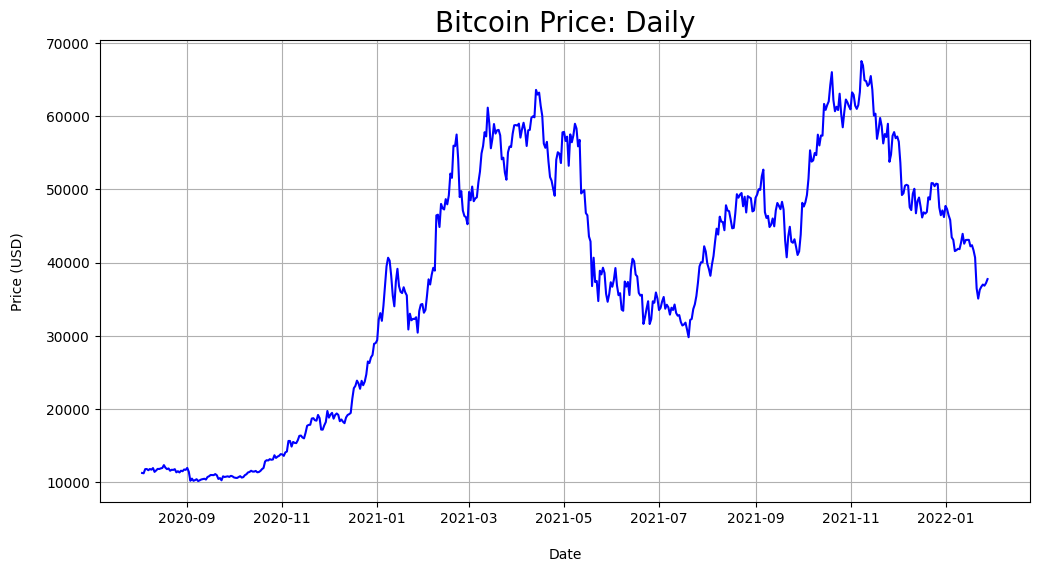

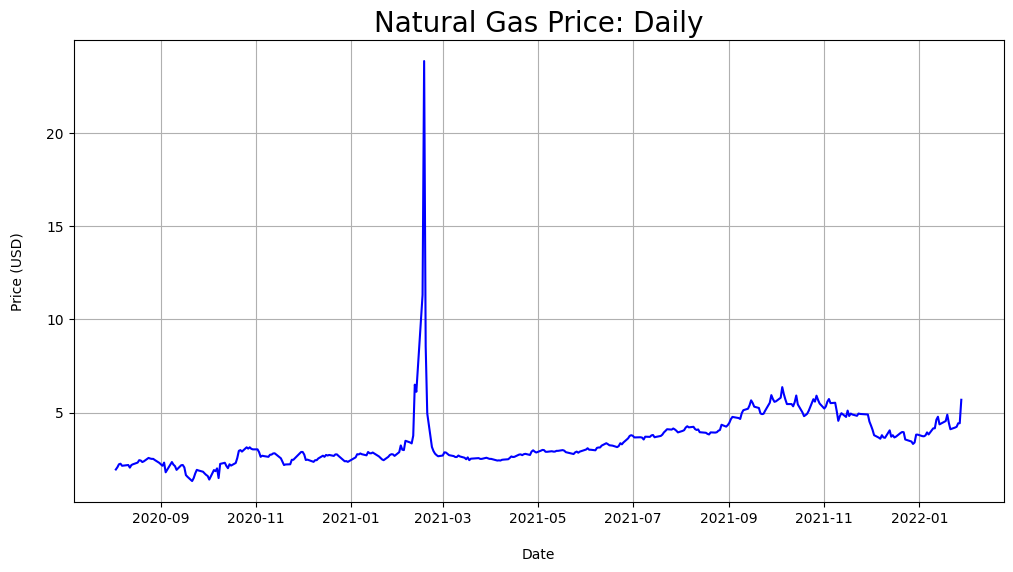

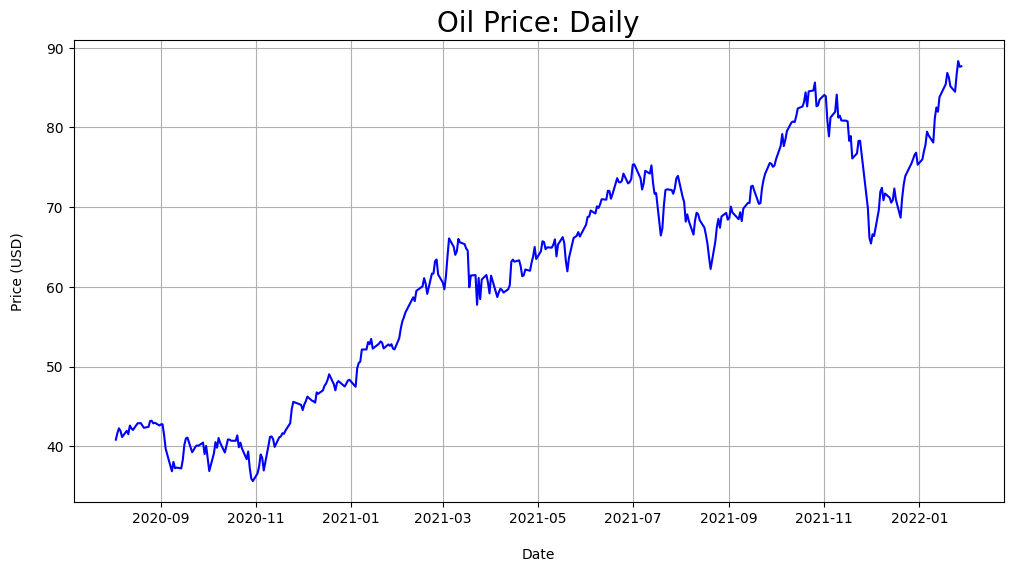

In [34]:
plt.figure(figsize=(12,6))
bitcoin_price, = plt.plot(bitcoin_price_df, color='blue')
plt.title('Bitcoin Price: Daily', fontsize=20)
plt.ylabel('Price (USD)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.grid()
#plt.savefig('daily bitcoin price.png')

plt.figure(figsize=(12,6))
gas_price, = plt.plot(gas_price_df, color='blue')
plt.title('Natural Gas Price: Daily', fontsize=20)
plt.ylabel('Price (USD)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.grid()
#plt.savefig('daily ng price.png')

plt.figure(figsize=(12,6))
oil_price, = plt.plot(oil_price_df, color='blue')
plt.title('Oil Price: Daily', fontsize=20)
plt.ylabel('Price (USD)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.grid()
#plt.savefig('daily oil price.png')

#

# Read Log-Return Data

In [11]:
#Read Gas Returns Data
gas_return_df = pd.read_csv(r'C:\Users\Anthony\Desktop\gas_return_clean_d.csv', parse_dates=[0], index_col=0, date_parser=parser)
gas_return_df = gas_return_df.rename(columns={'Return':'Nat Gas Return'})
print(gas_return_df.shape)
gas_return_df.head(5)


(374, 1)


,Nat Gas Return
Date,
2020-08-03,0.0276
2020-08-04,0.0259
2020-08-05,0.0323
2020-08-06,0.0058
2020-08-07,-0.0217


In [12]:
#Read Bitcoin Returns Data
bitcoin_return_df = pd.read_csv(r'C:\Users\Anthony\Desktop\bitcoin_return_clean_d.csv', parse_dates=[0], index_col=0, date_parser=parser)
bitcoin_return_df = bitcoin_return_df.rename(columns={'Return':'Bitcoin Return'})
print(bitcoin_return_df.shape)
bitcoin_return_df.head(5)


(544, 1)


,Bitcoin Return
Date,
2020-08-03,0.0064
2020-08-04,-0.0017
2020-08-05,0.0215
2020-08-06,0.0006
2020-08-07,-0.0060


In [13]:
#Read Oil Returns Data
oil_return_df = pd.read_csv(r'C:\Users\Anthony\Desktop\oil_return_clean_d.csv', parse_dates=[0], index_col=0, date_parser=parser)
oil_return_df = oil_return_df.rename(columns={'Return':'Oil Return'})
print(oil_return_df.shape)
oil_return_df.head(5)


(375, 1)


,Oil Return
Date,
2020-08-03,0.0078
2020-08-04,0.0088
2020-08-05,0.0060
2020-08-06,-0.0033
2020-08-07,-0.0080


# Clean Dataframes

### Merge Dataframes

In [14]:
#Bitcoin & Gas dataframe merge
bit_gas_merge_df = bitcoin_return_df.merge(gas_return_df, how='left', on=['Date']) 
bit_gas_merge_df.head(5)

#Bitcoin-Gas & Oil dataframe merge
bit_gas_oil_merge_df = bit_gas_merge_df.merge(oil_return_df, how='left', on=['Date'])
bit_gas_oil_merge_df.head(5)

,Bitcoin Return,Nat Gas Return,Oil Return
Date,,,
2020-08-03,0.0064,0.0276,0.0078
2020-08-04,-0.0017,0.0259,0.0088
2020-08-05,0.0215,0.0323,0.0060
2020-08-06,0.0006,0.0058,-0.0033
2020-08-07,-0.0060,-0.0217,-0.0080


### Drop NaN values & Rename Columns

In [15]:
#Drop NaN values
var_df = bit_gas_oil_merge_df.dropna()
var_df.shape
var_df.head(5)

,Bitcoin Return,Nat Gas Return,Oil Return
Date,,,
2020-08-03,0.0064,0.0276,0.0078
2020-08-04,-0.0017,0.0259,0.0088
2020-08-05,0.0215,0.0323,0.0060
2020-08-06,0.0006,0.0058,-0.0033
2020-08-07,-0.0060,-0.0217,-0.0080


# Stationarity Tests for Log-Differenced Data

In [16]:
#Stationarity test for US Natural Gas Return - Augmented Dickey-Fuller test
gas_array = gas_return_df.to_numpy()
perform_adf_test(gas_array)

ADF Statistic: -11.318070
p-value: 0.000000
Used Lag: 4.000000
Maximized IC: -1175.408706
Reject H0 - Time Series is Stationary


In [17]:
#Stationarity test for Bitcoin Return - Augmented Dickey-Fuller test
bit_array = bitcoin_return_df.to_numpy()
perform_adf_test(bit_array)

ADF Statistic: -24.202891
p-value: 0.000000
Used Lag: 0.000000
Maximized IC: -2779.657350
Reject H0 - Time Series is Stationary


In [18]:
#Stationarity test for US Oil Return - Augmented Dickey-Fuller test
oil_array = oil_return_df.to_numpy()
perform_adf_test(oil_array)

ADF Statistic: -14.759784
p-value: 0.000000
Used Lag: 1.000000
Maximized IC: -2289.447114
Reject H0 - Time Series is Stationary


# Time Series Plots: Log-Return Data

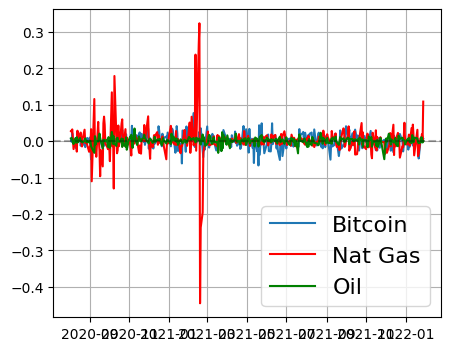

In [32]:
#Plot Returns
plt.figure(figsize=(,4))
bitcoin, = plt.plot(var_df['Bitcoin Return'])
gas, = plt.plot(var_df['Nat Gas Return'], color='red')
oil, = plt.plot(var_df['Oil Return'], color='green')
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.legend(['Bitcoin', 'Nat Gas', 'Oil'], fontsize=16)
plt.grid()
#plt.savefig('daily returns overlay.png')

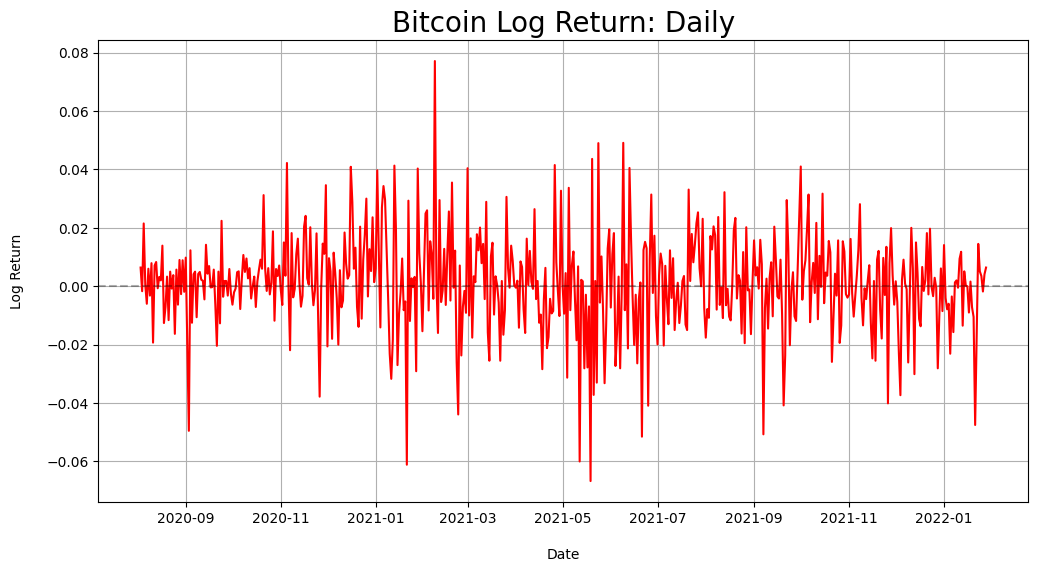

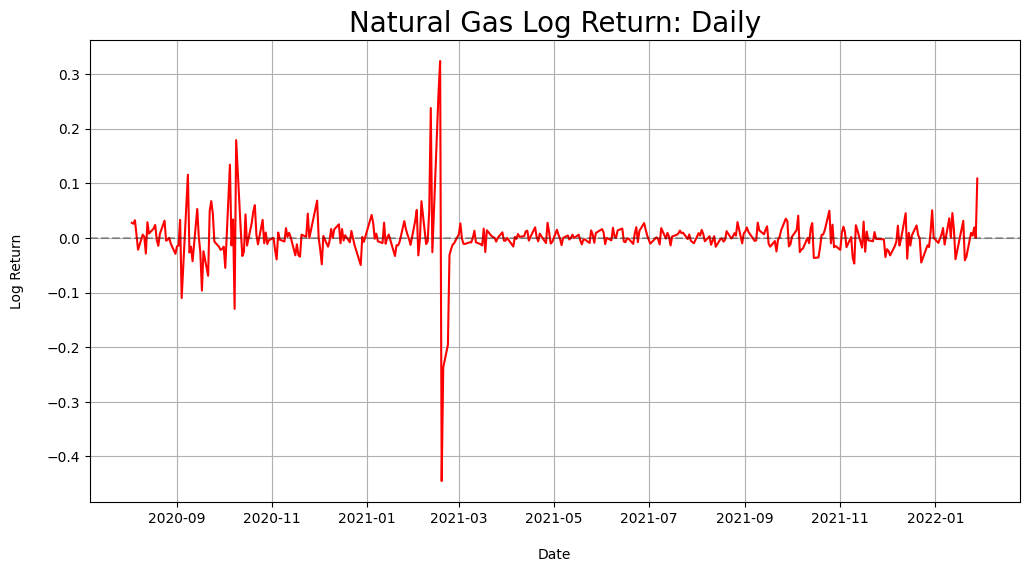

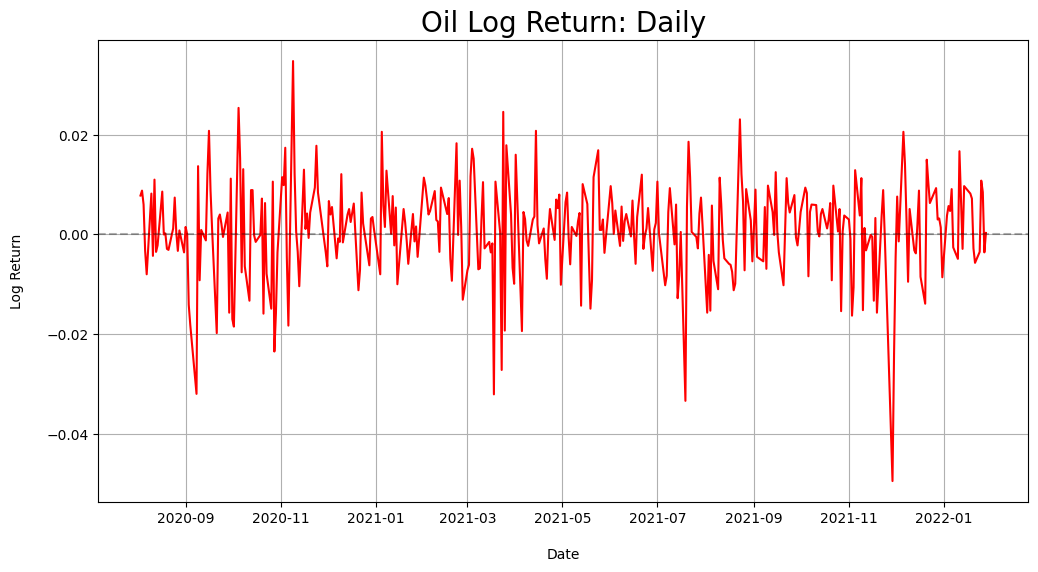

In [33]:
plt.figure(figsize=(12,6))
bitcoin_return, = plt.plot(bitcoin_return_df, color='red')
plt.title('Bitcoin Log Return: Daily', fontsize=20)
plt.ylabel('Log Return', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('daily bitcoin retrn.png')


plt.figure(figsize=(12,6))
gas_return, = plt.plot(gas_return_df, color='red')
plt.title('Natural Gas Log Return: Daily', fontsize=20)
plt.ylabel('Log Return',labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('daily ng returns.png')


plt.figure(figsize=(12,6))
oil_return, = plt.plot(oil_return_df, color='red')
plt.title('Oil Log Return: Daily', fontsize=20)
plt.ylabel('Log Return', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('daily oil returns.png')

# 

# VAR Model Fit & Results

### VAR Fit & Results: Model 1 

In [69]:
desc_stats_d = ds.describe(var_df).round(5)
desc_stats_d.head(20)
#desc_stats_d.to_csv(r'C:\Users\Anthony\Desktop\Disso images\tables\desc_stats_d.csv')
desc_stats_d.to_latex
print(desc_stats_d.to_latex (index=True))

C:\Users\Anthony\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\descriptivestats.py:418: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_res = stats.mode(ser.dropna())
C:\Users\Anthony\AppData\Local\Temp\ipykernel_3340\3393640578.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(desc_stats_d.to_latex (index=True))


\begin{tabular}{lrrr}
\toprule
{} &  Bitcoin Return &  Nat Gas Return &  Oil Return \\
\midrule
nobs             &       374.00000 &       374.00000 &   374.00000 \\
missing          &         0.00000 &         0.00000 &     0.00000 \\
mean             &         0.00094 &         0.00132 &     0.00091 \\
std\_err          &         0.00005 &         0.00012 &     0.00003 \\
upper\_ci         &         0.00103 &         0.00156 &     0.00096 \\
lower\_ci         &         0.00084 &         0.00108 &     0.00086 \\
std              &         0.01847 &         0.04603 &     0.00963 \\
iqr              &         0.02112 &         0.02338 &     0.01035 \\
iqr\_normal       &         0.01566 &         0.01733 &     0.00767 \\
mad              &         0.01370 &         0.02157 &     0.00710 \\
mad\_normal       &         0.01717 &         0.02703 &     0.00890 \\
coef\_var         &        19.73601 &        34.95556 &    10.63057 \\
range            &         0.14380 &         0.76900 &    

In [70]:
corr_d = var_df.corr(method='spearman').round(2)
#corr_d.to_csv(r'C:\Users\Anthony\Desktop\Disso images\tables\corr_d.csv')

In [71]:
corr_d.to_latex
print(corr_d.to_latex (index=True))

\begin{tabular}{lrrr}
\toprule
{} &  Bitcoin Return &  Nat Gas Return &  Oil Return \\
\midrule
Bitcoin Return &            1.00 &            0.10 &        0.08 \\
Nat Gas Return &            0.10 &            1.00 &        0.03 \\
Oil Return     &            0.08 &            0.03 &        1.00 \\
\bottomrule
\end{tabular}



C:\Users\Anthony\AppData\Local\Temp\ipykernel_3340\1294426346.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(corr_d.to_latex (index=True))


In [21]:
#Fit VAR Model
var_df = var_df[['Bitcoin Return','Nat Gas Return','Oil Return']]

In [22]:
model_1 = VAR(var_df)

C:\Users\Anthony\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
model_fit_1 = model_1.fit(6)

In [24]:
model_fit_1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 18, Sep, 2022
Time:                     21:15:19
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -22.7046
Nobs:                     368.000    HQIC:                  -23.0694
Log likelihood:           2779.51    FPE:                7.52939e-11
AIC:                     -23.3099    Det(Omega_mle):     6.47396e-11
--------------------------------------------------------------------
Results for equation Bitcoin Return
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.000868         0.000999            0.869           0.385
L1.Bitcoin Return        -0.077970         0.053902           -1.447           0.148
L1.Nat Gas Return         0.019146 

In [75]:
cat = model_fit_1.summary()

In [78]:
print(cat.as_latex())

AttributeError: 'VARSummary' object has no attribute 'as_latex'

### Impulse Response Function

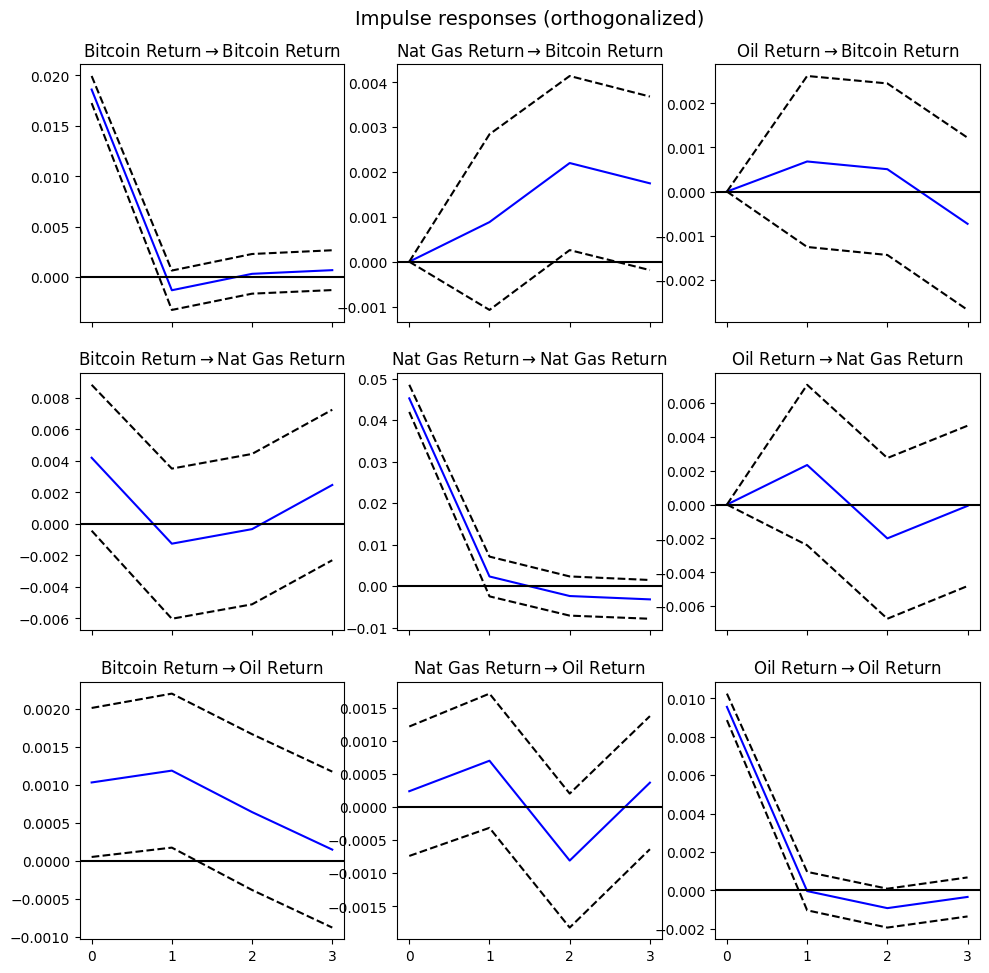

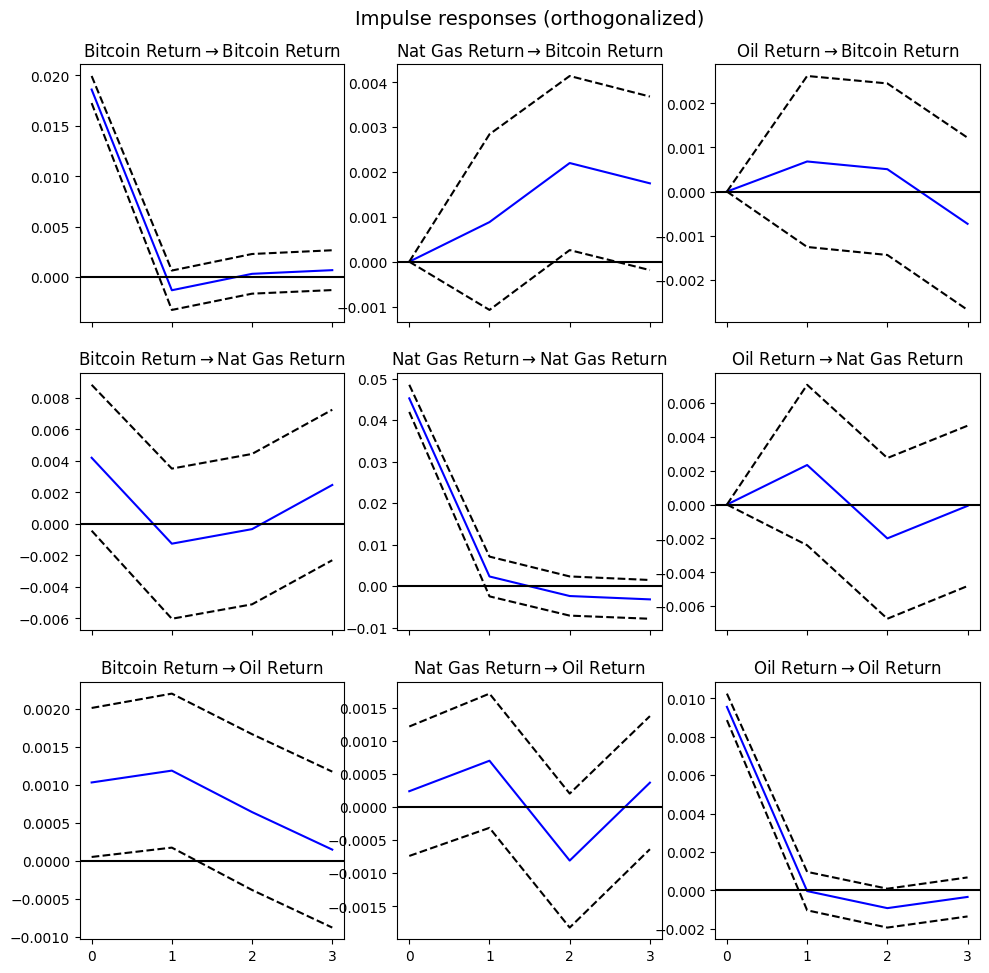

In [40]:
irf_1 = model_fit_1.irf(3)
irf_1.plot(orth=True)
#plt.savefig('daily impulse.png')

## VAR Fit & Results: Model 2 (GMT) 

In [26]:
#Fit VAR Model
var2_df = var2_df[['Bitcoin Return','Gas Return','Oil Return']]

NameError: name 'var2_df' is not defined

In [ ]:
model_2 = VAR(var2_df)

In [ ]:
model_fit_2 = model_2.fit(maxlags=3)


In [ ]:
model_fit_2.summary()

### Granger Causality Tests

In [41]:
gc_test_bitcoin = model_fit_1.test_causality('Nat Gas Return', ['Bitcoin Return'], kind='wald')
gc_test_bitcoin.summary()

Test statistic,Critical value,p-value,df
4.999,12.59,0.544,6


In [49]:
gc_test_bitcoin_10 = model_fit_1.test_causality('Nat Gas Return', ['Bitcoin Return'], kind='wald', signif=0.1)
gc_test_bitcoin_10.summary()

Test statistic,Critical value,p-value,df
4.999,10.64,0.544,6


In [50]:
gc_test_gas_5 = model_fit_1.test_causality('Bitcoin Return', ['Nat Gas Return'], kind='wald',)
gc_test_gas_5.summary()

Test statistic,Critical value,p-value,df
12.37,12.59,0.054,6


In [48]:
gc_test_gas_10 = model_fit_1.test_causality('Bitcoin Return', ['Nat Gas Return'], kind='wald', signif=0.1)
gc_test_gas_10.summary()

Test statistic,Critical value,p-value,df
12.37,10.64,0.054,6


### JB Non-Normality test - test for normal-distributed errors

In [43]:
jb_test_model_1 = model_fit_1.test_normality()
jb_test_model_1.summary()

Test statistic,Critical value,p-value,df
1.467e+04,12.59,0.000,6


### Portmanteau Test for Residual Autocorrelation

In [53]:
wh_test_model_1 = model_fit_1.test_whiteness()
wh_test_model_1.summary()

Test statistic,Critical value,p-value,df
41.29,51.00,0.250,36


In [55]:
model_fit_1.is_stable()

True

#

# OLS Fit & Results

### Create Lagged Variables

In [56]:
ind = pd.date_range(start='2020-08-03', end='2022-01-28')
lag_df = var_df.assign()
 

# Drop NaN values
t1_df = lag_df.shift(1).dropna()
t2_df = lag_df.shift(2).dropna()
t3_df = lag_df.shift(3).dropna()

#t1_df.shape 
#t2_df.shape
#t3_df.shape

#t1_df = lag_df.shift(1)
#t2_df = lag_df.shift(2)
#t3_df = lag_df.shift(3)

#print(t1_df, t2_df, t3_df)

# Drop NaN values
#t1_df = lag_df.dropna()
#t2_df = lag_df.dropna()
#t3_df = lag_df.dropna()

### Variables for Lagged Linear Regression Experiments

In [57]:
# Create dataframe with Bitcoin as independent variable and Gas as dependent variable

#X variables
t_bit_x_df = var_df.drop('Nat Gas Return',axis=1)
t1_bit_x_df = t_bit_x_df.merge(t1_df, how='left', on=['Date']).drop('Nat Gas Return', axis=1)
t1_bit_x_df = t1_bit_x_df.rename(columns={'Bitcoin Return_x':'Bitcoin Return', 'Oil Return_x':'Oil Return', 'Bitcoin Return_y':'Bitcoin Return (t-1)', 'Oil Return_y':'Oil Return (t-1)'})
t1_bit_x_df.head(5)

# Y Variable = gas_return_df




,Bitcoin Return,Oil Return,Bitcoin Return (t-1),Oil Return (t-1)
Date,,,,
2020-08-03,0.0064,0.0078,NaN,NaN
2020-08-04,-0.0017,0.0088,0.0064,0.0078
2020-08-05,0.0215,0.0060,-0.0017,0.0088
2020-08-06,0.0006,-0.0033,0.0215,0.0060
2020-08-07,-0.0060,-0.0080,0.0006,-0.0033


In [58]:
# Create dataframe with Gas as independent variable and Bitcoin as dependent variable

# X variables
t_gas_x_df = var_df.drop('Bitcoin Return', axis=1)
t1_gas_x_df = t_gas_x_df.merge(t1_df, how='left', on=['Date']).drop('Bitcoin Return', axis=1)
t1_gas_x_df = t1_gas_x_df.rename(columns={'Nat Gas Return_x':'Nat Gas Return', 'Oil Return_x':'Oil Return', 'Nat Gas Return_y':'Nat Gas Return (t-1)', 'Oil Return_y':'Oil Return (t-1)'})
t1_gas_x_df.head(5)

# Y variable = bitcoin_y_df



,Nat Gas Return,Oil Return,Nat Gas Return (t-1),Oil Return (t-1)
Date,,,,
2020-08-03,0.0276,0.0078,NaN,NaN
2020-08-04,0.0259,0.0088,0.0276,0.0078
2020-08-05,0.0323,0.0060,0.0259,0.0088
2020-08-06,0.0058,-0.0033,0.0323,0.0060
2020-08-07,-0.0217,-0.0080,0.0058,-0.0033


In [59]:
# Create dataframe with Bitcoin as independent variable and Gas as dependent variable

#X variables

t2_bit_x_df = t1_bit_x_df.merge(t2_df, how='left', on=['Date']).drop('Nat Gas Return', axis=1)
t2_bit_x_df = t2_bit_x_df.rename(columns={'Bitcoin Return_x':'Bitcoin Return', 'Oil Return_x':'Oil Return', 'Bitcoin Return_y':'Bitcoin Return (t-2)', 'Oil Return_y':'Oil Return (t-2)'})
t2_bit_x_df.head(5)

# Y Variable = gas_return_df


,Bitcoin Return,Oil Return,Bitcoin Return (t-1),Oil Return (t-1),Bitcoin Return (t-2),Oil Return (t-2)
Date,,,,,,
2020-08-03,0.0064,0.0078,NaN,NaN,NaN,NaN
2020-08-04,-0.0017,0.0088,0.0064,0.0078,NaN,NaN
2020-08-05,0.0215,0.0060,-0.0017,0.0088,0.0064,0.0078
2020-08-06,0.0006,-0.0033,0.0215,0.0060,-0.0017,0.0088
2020-08-07,-0.0060,-0.0080,0.0006,-0.0033,0.0215,0.0060


In [60]:
# Create dataframe with Gas as independent variable and Bitcoin as dependent variable

# X variables

t2_gas_x_df = t1_gas_x_df.merge(t2_df, how='left', on=['Date']).drop('Bitcoin Return', axis=1)
t2_gas_x_df = t2_gas_x_df.rename(columns={'Nat Gas Return_x':'Nat Gas Return', 'Oil Return_x':'Oil Return', 'Nat Gas Return_y':'Nat Gas Return (t-2)', 'Oil Return_y':'Oil Return (t-2)'})
t2_gas_x_df.head(5)

# Y variable = bitcoin_y_df


,Nat Gas Return,Oil Return,Nat Gas Return (t-1),Oil Return (t-1),Nat Gas Return (t-2),Oil Return (t-2)
Date,,,,,,
2020-08-03,0.0276,0.0078,NaN,NaN,NaN,NaN
2020-08-04,0.0259,0.0088,0.0276,0.0078,NaN,NaN
2020-08-05,0.0323,0.0060,0.0259,0.0088,0.0276,0.0078
2020-08-06,0.0058,-0.0033,0.0323,0.0060,0.0259,0.0088
2020-08-07,-0.0217,-0.0080,0.0058,-0.0033,0.0323,0.0060


In [61]:
# Create dataframe with Bitcoin as independent variable and Gas as dependent variable

#X variables

t3_bit_x_df = t2_bit_x_df.merge(t3_df, how='left', on=['Date']).drop('Nat Gas Return', axis=1)
t3_bit_x_df = t3_bit_x_df.rename(columns={'Bitcoin Return_x':'Bitcoin Return', 'Oil Return_x':'Oil Return', 'Bitcoin Return_y':'Bitcoin Return (t-3)', 'Oil Return_y':'Oil Return (t-3)'})
t3_bit_x_df.head(5)

# Y Variable = gas_return_df


,Bitcoin Return,Oil Return,Bitcoin Return (t-1),Oil Return (t-1),Bitcoin Return (t-2),Oil Return (t-2),Bitcoin Return (t-3),Oil Return (t-3)
Date,,,,,,,,
2020-08-03,0.0064,0.0078,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04,-0.0017,0.0088,0.0064,0.0078,NaN,NaN,NaN,NaN
2020-08-05,0.0215,0.0060,-0.0017,0.0088,0.0064,0.0078,NaN,NaN
2020-08-06,0.0006,-0.0033,0.0215,0.0060,-0.0017,0.0088,0.0064,0.0078
2020-08-07,-0.0060,-0.0080,0.0006,-0.0033,0.0215,0.0060,-0.0017,0.0088


In [62]:
# Create dataframe with Gas as independent variable and Bitcoin as dependent variable

# X variables

t3_gas_x_df = t2_gas_x_df.merge(t3_df, how='left', on=['Date']).drop('Bitcoin Return', axis=1)
t3_gas_x_df = t3_gas_x_df.rename(columns={'Nat Gas Return_x':'Nat Gas Return', 'Oil Return_x':'Oil Return', 'Nat Gas Return_y':'Nat Gas Return (t-3)', 'Oil Return_y':'Oil Return (t-3)'})
t3_gas_x_df.head(5)

# Y variable = bitcoin_y_df


,Nat Gas Return,Oil Return,Nat Gas Return (t-1),Oil Return (t-1),Nat Gas Return (t-2),Oil Return (t-2),Nat Gas Return (t-3),Oil Return (t-3)
Date,,,,,,,,
2020-08-03,0.0276,0.0078,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04,0.0259,0.0088,0.0276,0.0078,NaN,NaN,NaN,NaN
2020-08-05,0.0323,0.0060,0.0259,0.0088,0.0276,0.0078,NaN,NaN
2020-08-06,0.0058,-0.0033,0.0323,0.0060,0.0259,0.0088,0.0276,0.0078
2020-08-07,-0.0217,-0.0080,0.0058,-0.0033,0.0323,0.0060,0.0259,0.0088


### Correlation Matrix

In [ ]:
#t-1 merge
a = var_df.merge(t1_bit_x_df['Bitcoin Return (t-1)'], how='left', on=['Date'])
b = a.merge(t1_gas_x_df['Nat Gas Return (t-1)'], how='left', on=['Date'])
c = b.merge(t1_gas_x_df['Oil Return (t-1)'], how='left', on=['Date'])
#c.head(5)

#t-2 merge
d = c.merge(t2_bit_x_df['Bitcoin Return (t-2)'], how='left', on=['Date'])
e = d.merge(t2_gas_x_df['Nat Gas Return (t-2)'], how='left', on=['Date'])
f = e.merge(t2_gas_x_df['Oil Return (t-2)'], how='left', on=['Date'])
#f.head(5)

g = f.merge(t3_bit_x_df['Bitcoin Return (t-3)'], how='left', on=['Date'])
h = g.merge(t3_gas_x_df['Nat Gas Return (t-3)'], how='left', on=['Date'])
i = h.merge(t3_gas_x_df['Oil Return (t-3)'], how='left', on=['Date'])
#i.head(5)
                        
i.corr(method='spearman').round(2)

### Summary Statistics

In [ ]:
i.describe().round(5)

In [ ]:
ds.describe(i).round(5)

### OLS (T)

In [63]:
#X variables = t_bit_x_df
#Y Variable = gas_return_df

# OLS Fit & Results
t_bit_x_df = sm.add_constant(t_bit_x_df)
results = sm.OLS(gas_return_df, t_bit_x_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Nat Gas Return   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.528
Date:                Mon, 19 Sep 2022   Prob (F-statistic):              0.218
Time:                        18:12:18   Log-Likelihood:                 622.69
No. Observations:                 374   AIC:                            -1239.
Df Residuals:                     371   BIC:                            -1228.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0010      0.002      0.426      0.671      -0.004       0.006
Bitcoin Return     0.2126      0.129      1.644      0.101      -0.042       0.467
Oil Return         0.1115      0.248      0.449      0.653      -0.376       0.599
==============================================================================
Omnibus:                      191.842   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20343.696
Skew:                          -1.142   Prob(JB):                         0.00
Kurtosis:                      39.059   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Y variable
t_drop_oil_df = var_df.drop('Oil Return', axis=1)
bitcoin_y_df = t_drop_oil_df.drop('Nat Gas Return', axis=1)
# X variables = t_gas_x_df

# OLS Fit & Results
t_gas_x_df = sm.add_constant(t_gas_x_df)
results_2 = sm.OLS(bitcoin_y_df, t_gas_x_df).fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Bitcoin Return   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.785
Date:                Mon, 19 Sep 2022   Prob (F-statistic):             0.0630
Time:                        18:12:22   Log-Likelihood:                 965.47
No. Observations:                 374   AIC:                            -1925.
Df Residuals:                     371   BIC:                            -1913.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0007      0.001      0.779      0.436      -0.001       0.003
Nat Gas Return     0.0340      0.021      1.644      0.101      -0.007       0.075
Oil Return         0.1624      0.099      1.642      0.101      -0.032       0.357
==============================================================================
Omnibus:                       15.845   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.506
Skew:                          -0.078   Prob(JB):                     7.17e-09
Kurtosis:                       4.543   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS (T-1)

In [65]:
# OLS Fit & Results
t1_bit_x_df = sm.add_constant(t1_bit_x_df)
results_bit_t1 = sm.OLS(gas_return_df, t1_bit_x_df, missing='drop').fit()
results_bit_t1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Nat Gas Return   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.142
Date:                Mon, 19 Sep 2022   Prob (F-statistic):              0.336
Time:                        19:04:01   Log-Likelihood:                 621.46
No. Observations:                 373   AIC:                            -1233.
Df Residuals:                     368   BIC:                            -1213.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0008      0.002      0.353      0.724      -0.004       0.006
Bitcoin Return           0.2005      0.130      1.544      0.123      -0.055       0.456
Oil Return               0.1286      0.250      0.514      0.607      -0.363       0.621
Bitcoin Return (t-1)    -0.1204      0.130     -0.923      0.357      -0.377       0.136
Oil Return (t-1)         0.2300      0.249      0.924      0.356      -0.259       0.719
==============================================================================
Omnibus:                      188.849   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19972.429
Skew:                          -1.111   Prob(JB):                         0.00
Kurtosis:                      38.779   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# OLS Fit & Results
t1_gas_x_df = sm.add_constant(t1_gas_x_df)
results_gas_t1 = sm.OLS(bitcoin_y_df, t1_gas_x_df, missing='drop').fit()
results_gas_t1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Bitcoin Return   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.660
Date:                Mon, 19 Sep 2022   Prob (F-statistic):              0.159
Time:                        19:04:56   Log-Likelihood:                 962.99
No. Observations:                 373   AIC:                            -1916.
Df Residuals:                     368   BIC:                            -1896.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0007      0.001      0.694      0.488      -0.001       0.003
Nat Gas Return           0.0318      0.021      1.526      0.128      -0.009       0.073
Oil Return               0.1563      0.099      1.573      0.117      -0.039       0.352
Nat Gas Return (t-1)     0.0179      0.021      0.854      0.394      -0.023       0.059
Oil Return (t-1)         0.0621      0.099      0.626      0.532      -0.133       0.257
==============================================================================
Omnibus:                       15.398   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.211
Skew:                          -0.062   Prob(JB):                     1.37e-08
Kurtosis:                       4.521   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS (T-2)

In [67]:
# OLS Fit & Results
t2_bit_x_df = sm.add_constant(t2_bit_x_df)
results_bit_t2 = sm.OLS(gas_return_df, t2_bit_x_df, missing='drop').fit()
results_bit_t2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Nat Gas Return   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9852
Date:                Mon, 19 Sep 2022   Prob (F-statistic):              0.435
Time:                        19:12:29   Log-Likelihood:                 620.13
No. Observations:                 372   AIC:                            -1226.
Df Residuals:                     365   BIC:                            -1199.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0011      0.002      0.433      0.665      -0.004       0.006
Bitcoin Return           0.2084      0.130      1.598      0.111      -0.048       0.465
Oil Return               0.1160      0.253      0.459      0.646      -0.381       0.613
Bitcoin Return (t-1)    -0.1222      0.131     -0.931      0.352      -0.380       0.136
Oil Return (t-1)         0.2496      0.251      0.995      0.320      -0.244       0.743
Bitcoin Return (t-2)    -0.1062      0.131     -0.811      0.418      -0.364       0.151
Oil Return (t-2)        -0.1950      0.251     -0.777      0.438      -0.689       0.299
==============================================================================
Omnibus:                      185.034   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19759.458
Skew:                          -1.066   Prob(JB):                         0.00
Kurtosis:                      38.641   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# OLS Fit & Results
t2_gas_x_df = sm.add_constant(t2_gas_x_df)
results_gas_t2 = sm.OLS(bitcoin_y_df, t2_gas_x_df, missing='drop').fit()
results_gas_t2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Bitcoin Return   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.492
Date:                Mon, 19 Sep 2022   Prob (F-statistic):             0.0224
Time:                        19:12:56   Log-Likelihood:                 964.06
No. Observations:                 372   AIC:                            -1914.
Df Residuals:                     365   BIC:                            -1887.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0005      0.001      0.529      0.597      -0.001       0.002
Nat Gas Return           0.0358      0.021      1.728      0.085      -0.005       0.077
Oil Return               0.1876      0.099      1.887      0.060      -0.008       0.383
Nat Gas Return (t-1)     0.0116      0.021      0.555      0.579      -0.030       0.053
Oil Return (t-1)         0.0466      0.099      0.472      0.637      -0.148       0.241
Nat Gas Return (t-2)     0.0541      0.021      2.585      0.010       0.013       0.095
Oil Return (t-2)         0.1155      0.099      1.166      0.245      -0.079       0.310
==============================================================================
Omnibus:                       15.408   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.081   Prob(JB):                     1.71e-08
Kurtosis:                       4.510   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS (T-3)

In [ ]:
# OLS Fit & Results
t3_bit_x_df = sm.add_constant(t3_bit_x_df)
results_bit_t3 = sm.OLS(gas_return_df, t3_bit_x_df, missing='drop').fit()
results_bit_t3.summary()

In [ ]:
# OLS Fit & Results
t3_gas_x_df = sm.add_constant(t3_gas_x_df)
results_gas_t3 = sm.OLS(bitcoin_y_df, t3_gas_x_df, missing='drop').fit()
results_gas_t3.summary()

# IGNORE

In [ ]:
#Correlation over lags

#for lag in range(1, 30):
    #gas_series = var2_df['Gas Return'].iloc[lag:]
    #lagged_bitcoin_series = var2_df['Bitcoin Return'].iloc[:-lag]
    #print('Lag: %s'%lag)
    #print(pearsonr(gas_series, lagged_bitcoin_series))
    #print('------')

## Shape and Head Dataframe Check

In [ ]:
# Shape of dataframes
#print(gas_return_df.shape,
#t_bitcoin_x_df.shape,
#t_bitcoin_y_df.shape,
#t_gas_x_df.shape)

In [ ]:
# Head of dataframes
#print(gas_return_df.head,
#t_bitcoin_x_df.head,
#t_bitcoin_y_df.head,
#t_gas_x_df.head)